<a href="https://colab.research.google.com/github/Dr-Carlos-Villasenor/PatternRecognition/blob/main/PR09_1_Reduc_Dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reconocimiento de Patrones
##Dr. Carlos Villaseñor
##Reducción de la dimensionalidad

# Preparar datos

Primeramente importaremos unos paquetes

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Leemos los datos


In [ ]:
from sklearn.datasets import fetch_openml
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)

Para no tomar todos los datos vamos a usar los primeros 5000

In [ ]:
n_samples = 5000
x=np.array(x.iloc[:n_samples,:])
y=np.array(y[:n_samples].ravel(),dtype=np.int)
print(x.shape, y.shape)

In [ ]:
# Dibujar un ejemplo de manera aleatoria
sample = np.random.randint(x.shape[0])
plt.imshow(x[sample].reshape((28,28)), cmap=plt.cm.gray)
plt.title('Target: %s'%y[sample])
plt.show()

## Clasificación de digitos con PCA y SVM

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [44]:
# Separar conjuntos de entrenamiento y prueba
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1)

In [45]:
 # Instanciar modelo
model = Pipeline([('scaler', StandardScaler()),
                  ('PCA', PCA(n_components=50)),
                  ('SVM', svm.SVC(gamma=0.0001))])

In [ ]:
 # Entrenar modelo
model.fit(xtrain, ytrain)

In [ ]:
# Aplicar metrica al modelo
print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

In [53]:
# Hacer predicciones del test
ypred = model.predict(xtest)

In [ ]:
print('Classification report: \n', classification_report(ytest, ypred))

In [69]:
cm = confusion_matrix(ytest, ypred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=model.classes_)
disp.plot()

AttributeError: ignored

In [ ]:
# Dibujar una predicción aleatoria
sample = np.random.randint(xtest.shape[0])
plt.imshow(xtest[sample].reshape((28,28)), cmap=plt.cm.gray)
plt.title('Prediction: %i' % ypred[sample])
plt.show()

## Guardar Modelo

In [62]:
# Guardar modelo
from joblib import dump
dump(model, 'mnist_classifier.joblib')

['mnist_classifier.joblib']

In [63]:
from joblib import load
model2 = load('mnist_classifier.joblib')

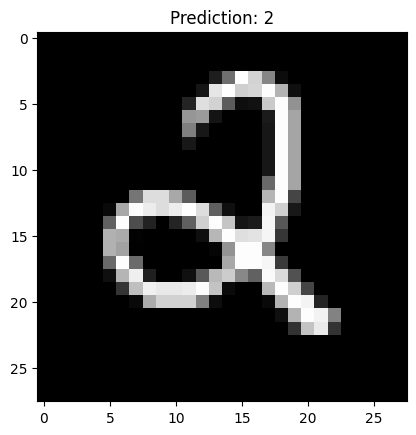

In [64]:
# Dibujar una predicción aleatoria
sample = np.random.randint(xtest.shape[0])
plt.imshow(xtest[sample].reshape((28,28)), cmap=plt.cm.gray)
ypred = model2.predict(xtest[sample].reshape(1,-1))
plt.title('Prediction: %i' % ypred)
plt.show()

## Reducción de la dimensionalidad con t-SNE

In [65]:
from sklearn.manifold import TSNE

In [66]:
 model = TSNE(n_components=2, n_iter=2000, n_jobs=-1)

In [ ]:
x_2d = model.fit_transform(x)
x_2d.shape

In [ ]:
plt.scatter(x_2d[:,0],x_2d[:,1], c=y, cmap=plt.cm.tab10)